## Script até aqui

In [ ]:
caminho_dados = '/content/drive/MyDrive/Curso AD/dados_viagens/2023_Viagem.csv'

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=',')

# Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

# Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
 .groupby('Cargo')
 .agg(
    despesa_media=('Despesas', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_mais_frequente=('Destinos', pd.Series.mode),
    n_viagens=('Nome', 'count')
    )
 .reset_index()
 .sort_values(by='despesas_totais', ascending=False))

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

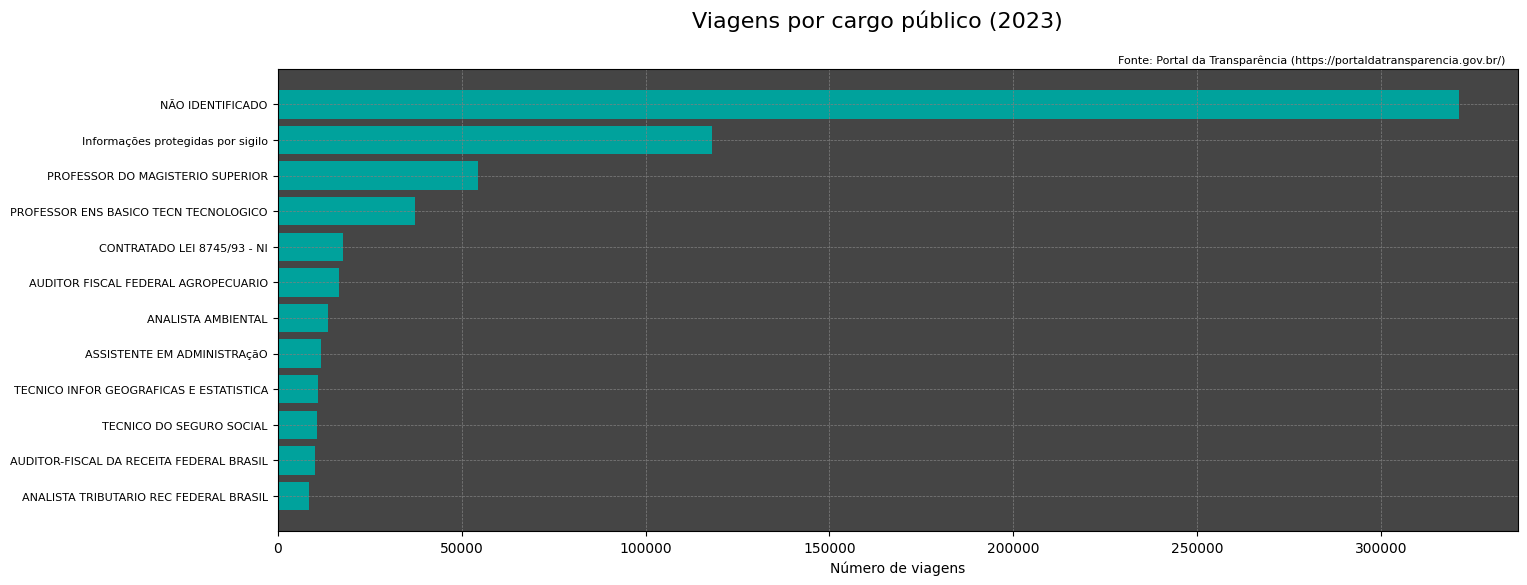

In [ ]:
import matplotlib.pyplot as plt

# Cria a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plota o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color='#00A29C')
ax.invert_yaxis()

# Ajusta o gráfico
ax.set_facecolor('#454545')
fig.suptitle('Viagens por cargo público (2023)', fontsize=16)
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Número de viagens')

# Exibe o gráfico
plt.show()

## Análise exploratória
Vamos plotar um gráfico com o conjunto de dados inicial:

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825756,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,December,1
825757,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,December,2
825758,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,December,1
825759,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,December,0


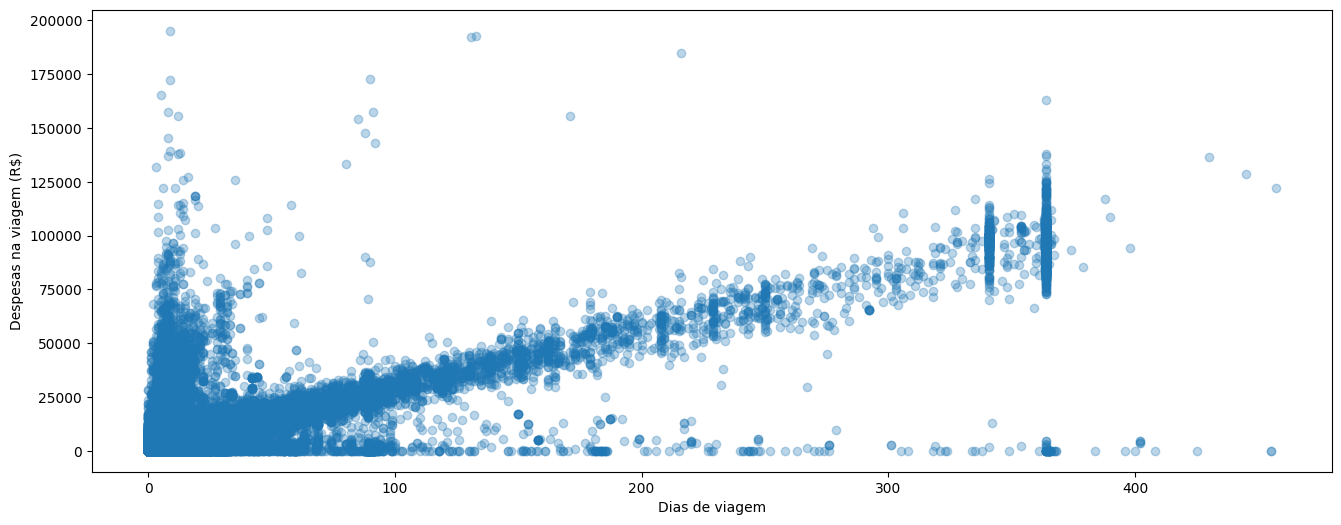

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df_viagens['Dias de viagem'], df_viagens['Despesas'], alpha=0.3)

plt.xlabel('Dias de viagem')
plt.ylabel('Despesas na viagem (R$)')

plt.show()

### Pelo gráfico, concluímos que:
- Forte associação visual entre dias de viagem X despesas (faz sentido)
- Temos algumas poucas viagens que gastaram muito dinheiro em pouco tempo - vamos encontrá-las!

In [ ]:
df_viagens['Despesas'] > 175_000

,Despesas
0,False
1,False
2,False
3,False
4,False
...,...
825756,False
825757,False
825758,False
825759,False


Com `df.value_counts()`, encontramos onde estão:

In [ ]:
(df_viagens['Despesas'] > 175_000).value_counts()

,count
Despesas,
False,825757
True,4


E com o filtro, selecionamos apenas estas linhas:

In [ ]:
df_viagens[df_viagens['Despesas'] > 175_000]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
128979,18782567,000277/23-5C,Realizada,SIM,A autorização de afastamento foi publicada hoj...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.739.980-**,LEANDRO AUGUSTO ANDERSON,NÃO IDENTIFICADO,CCX-0207,CCX-0207,2023-03-26,2023-08-04,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,174812.69,11610.06,0.00,5625.81,192048.56,March,131
129029,18782625,000289/23-5C,Realizada,SIM,Devido ao cancelamento da Visita Oficial do PR...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.919.570-**,LUIS CARLOS MACHADO DA SILVA,NÃO IDENTIFICADO,CCX-0207,CCX-0207,2023-03-26,2023-08-06,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,175337.40,11757.14,0.00,5581.48,192676.02,March,133
206861,18877982,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006200249,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-06-18,2024-01-20,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,160692.47,14583.60,0.00,9511.35,184787.42,June,216
466406,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9


A viagem que mais chama à atenção é a do ministro, que durou apenas 9 dias.

Vamos acessar os dados de passagens (tabela separada) e buscar pelo **identificador da viagem**:

In [ ]:
caminho_dados_passagens = '/content/drive/MyDrive/Curso AD/dados_viagens/2023_Passagem.csv'

df_passagens = pd.read_csv(caminho_dados_passagens, encoding='Windows-1252', sep=';', decimal=',')
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387138,2023001628,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2791.41,0.00,NaN,00:00
387139,2023001628,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1764.54,0.00,NaN,00:00
387140,2023001631,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1985.65,0.00,NaN,00:00
387141,2023001631,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1759.88,0.00,NaN,00:00


Aqui, temos informação de cada trecho da viagem e de seus custos. Filtrando pelo processo `19194886`:

In [ ]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19194886]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
231830,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,35304.33,0.00,20/11/2023,17:47
231831,19194886,004304/23,Aéreo,Indonésia,NaN,Jacarta,Camboja,NaN,Phnom Penh,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1667.56,0.00,22/08/2023,14:53
231832,19194886,004304/23,Aéreo,Brasil,São Paulo,São Paulo,Indonésia,NaN,Jacarta,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,41529.96,0.00,22/08/2023,14:53
231833,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,51557.43,0.00,17/10/2023,17:58
231834,19194886,004304/23,Aéreo,CINGAPURA,NaN,CINGAPURA,Estados Unidos da América,NaN,Nova York,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,42368.61,0.00,17/10/2023,17:57
231835,19194886,004304/23,Aéreo,Filipinas,NaN,San Juan - Metro Manila,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7926.43,0.00,20/09/2023,11:06
231836,19194886,004304/23,Aéreo,Camboja,NaN,Phnom Penh,CINGAPURA,NaN,CINGAPURA,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6368.97,0.00,17/10/2023,16:33


É bastante dinheiro, mas não parece nada fora do esperado para viagens de primeira classe.

## Unindo tabelas
- Na tabela de viagens, cada linha representa uma viagem.
- Mas na tabela de passagens, cada linha é um trecho da viagem - ou seja, as viagens são compostas de múltiplas passagens.

Isto significa que uma linha na primeira tabela está relacionada a múltiplas linhas na segunda. E a **chave** entre as duas tabelas é o identificador!

Esse é um padrão muito comum de encontramos em tabelas. Tanto é que o próprio pandas possui uma forma de unir tabelas em uma só com `df.merge`:

In [ ]:
df_viagens.merge(df_passagens, on='Identificador do processo de viagem')

,Identificador do processo de viagem,Número da Proposta (PCDP)_x,Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem,Número da Proposta (PCDP)_y,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,January,19,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04
1,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39
2,18306758,000002/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.295.391-**,VITOR LUIS MARTINS FARIA,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42
3,18306785,000004/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.221.068-**,RAFAEL RODRIGO MANCIN DE MORAIS,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:51
4,18306786,000003/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.850.918-**,BRUNO NOCENTE REGATO PEREIRA,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387146,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,December,1,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2791.41,0.00,NaN,00:00
387147,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO B

Veja que isso faz com que as linhas da tabela inicial (que possuía uma única viagem por linha) tenham de ser repetidas para "caber" na tabela de passagens!

In [ ]:
dados_combinados = df_viagens.merge(df_passagens, on='Identificador do processo de viagem')
dados_combinados[dados_combinados['Identificador do processo de viagem'] == 19194886]

,Identificador do processo de viagem,Número da Proposta (PCDP)_x,Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem,Número da Proposta (PCDP)_y,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
231838,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,35304.33,0.00,20/11/2023,17:47
231839,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9,004304/23,Aéreo,Indonésia,NaN,Jacarta,Camboja,NaN,Phnom Penh,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1667.56,0.00,22/08/2023,14:53
231840,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9,004304/23,Aéreo,Brasil,São Paulo,São Paulo,Indonésia,NaN,Jacarta,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,41529.96,0.00,22/08/2023,14:53
231841,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,51557.43,0.00,17/10/2023,17:58
231842,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9,004304/23,Aéreo,CINGAPURA,NaN,CINGAPURA,Estados Unidos da América,NaN,Nova York,Sem informação,Sem informação,Sem informação,Sem infor